## Library used
1. numpy
2. tensorflow
3. keras
4. seaborn
5. matplotlib

## Steps
1. Load the Dataset (mnist)
2. Feature Scaling ( Normalize )
3. Flatten the data
4. Fit the Model
5. Evaluate the model
6. Do Prediction
7. Save the model
8. Load model for other data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

## Data loading naming
### Train
1. x_train = train image
2. y_train = level of the train data

### Test
1. x_test = test image
2. y_test = level of the test data


In [26]:
# load data
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
# x_train
# y_train
# y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

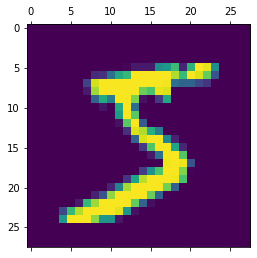

In [16]:
# Let's plot the 1st data as image
plt.matshow(x_train[0])

In [17]:
y_train[0]

5

### Feature Sclaing
### Normalize 

In [27]:
# Here we have done it manually :P
x_train = x_train / 255


x_test = x_test / 255


In [ ]:
# x_test[1]
# x_train[1]

## Flatten the images into 28*28 = 784 aka 1D array
here -1 means : It simply means that you are not sure about what number of rows or columns you can give and you are asking numpy to suggest number of column or rows to get reshaped in.

In [30]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1, 784)

In [32]:
# x_test[1]
x_train[1].shape

(784,)

In [33]:
x_train.shape

(60000, 784)

## Developing the model

In [35]:
model = keras.Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 784))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [36]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [37]:
model.fit( x_train,
          to_categorical(y_train),
          epochs=10,
          batch_size = 32
         )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2710 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1214 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0886 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0551 - accuracy: 0.9829
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - accuracy: 0.9868
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0324 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9903
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.025

## Evaluate the model

In [38]:
pred = model.predict(x_test)

In [41]:
# pred
np.argmax(pred[1])

2

In [42]:
y_test[1]

2

In [44]:
# Testing the output manually
np.argmax(pred[1]) == y_test[1]

True

Text(69.0, 0.5, 'Truth Values')

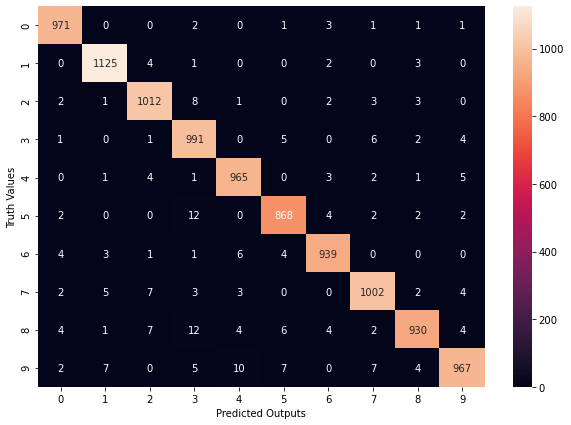

In [46]:
htmap_pred = model.predict(x_test)
ypred = [np.argmax(i) for i in htmap_pred]
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=ypred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')